In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [2]:
train_X = pd.read_csv('C:/Users/LENOVO/OneDrive/Desktop/PYTHON/House Price Prediction/data/processed/train_X.csv')
test_X = pd.read_csv('C:/Users/LENOVO/OneDrive/Desktop/PYTHON/House Price Prediction/data/processed/test_X.csv')
train_y = pd.read_csv('C:/Users/LENOVO/OneDrive/Desktop/PYTHON/House Price Prediction/data/processed/train_y.csv')
test_y = pd.read_csv('C:/Users/LENOVO/OneDrive/Desktop/PYTHON/House Price Prediction/data/processed/test_y.csv')
train_X = train_X.drop("Unnamed: 0", axis=1)
test_X = test_X.drop("Unnamed: 0", axis=1)

In [27]:
dt = DecisionTreeRegressor(random_state=15, max_depth=30, min_samples_split=95)
dt.fit(train_X, train_y)
    
dt_predict = dt.predict(test_X)
mae_dt = mean_absolute_error(test_y, dt_predict)
print(f'Decision Tree MAE: {mae_dt}')

Decision Tree MAE: 157084.4302379461


In [31]:
rf = RandomForestRegressor(random_state=15, n_estimators=i)
rf.fit(train_X, train_y)

rf_predict = rf.predict(test_X)
mae_rf = mean_absolute_error(test_y, rf_predict)
print(f'Random Forest MAE: {mae_rf}')

C:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest MAE: 141622.5403525048


In [32]:
mae_results = pd.DataFrame({
    "Model": ["Decision Tree", "Random Forest"],
    "MAE": [mae_dt, mae_rf]
})
print(mae_results)

           Model            MAE
0  Decision Tree  157084.430238
1  Random Forest  141622.540353


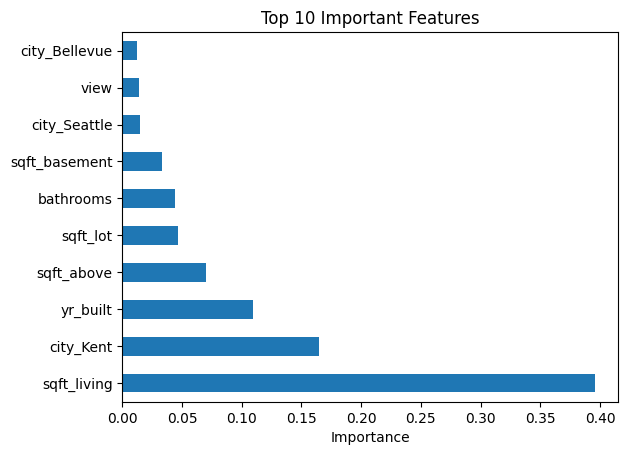

In [33]:
import matplotlib.pyplot as plt

feature_importance = pd.Series(rf.feature_importances_, index=train_X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.xlabel('Importance')
plt.savefig('C:/Users/LENOVO/OneDrive/Desktop/PYTHON/House Price Prediction/outputs/notebook 3/feat_importance for rf.png')
plt.show()
plt.close()

In [34]:
import joblib

joblib.dump(rf, "model/random_forest_model.pkl")

['model/random_forest_model.pkl']